# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
#建立模型
model = Sequential()

In [13]:
model.add(Dense(units=256, input_dim=784,kernel_initializer='normal',activation='relu'))

In [14]:
model.add(Dense(units=256,kernel_initializer='normal',activation='relu'))

In [15]:
model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))

In [16]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 283,850
Trainable params: 283,850
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.2647 - accuracy: 0.9205 - val_loss: 0.1093 - val_accuracy: 0.9661
Epoch 2/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.1008 - accuracy: 0.9694 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 3/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0962 - val_accuracy: 0.9703
Epoch 4/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0931 - val_accuracy: 0.9736
Epoch 5/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.1139 - val_accuracy: 0.9709
Epoch 6/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0925 - val_accuracy: 0.9758
Epoch 7/10
48000/48000 [==============================] - 5s 1

In [27]:
train_history.history

{'val_loss': [0.10932466807744155,
  0.09582184652037298,
  0.09620105384600659,
  0.09310332747665234,
  0.11385175457277606,
  0.09250563802988715,
  0.13547846227002933,
  0.10023015787960807,
  0.1061372933118934,
  0.1283844499884047],
 'val_accuracy': [0.9660833477973938,
  0.9712499976158142,
  0.9703333377838135,
  0.9735833406448364,
  0.9709166884422302,
  0.9758333563804626,
  0.9667500257492065,
  0.9780833125114441,
  0.9774166941642761,
  0.9729999899864197],
 'loss': [0.2646635860335082,
  0.10076643676365105,
  0.06954960521411462,
  0.05212712811137317,
  0.04433249196428612,
  0.03327810167243297,
  0.02925943022232362,
  0.025703677354251945,
  0.021299839062337015,
  0.019023940875050813],
 'accuracy': [0.9204792,
  0.969375,
  0.97835416,
  0.9838542,
  0.985625,
  0.9890417,
  0.9904583,
  0.99170834,
  0.9929375,
  0.9936875]}

# 以圖形顯示訓練過程

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

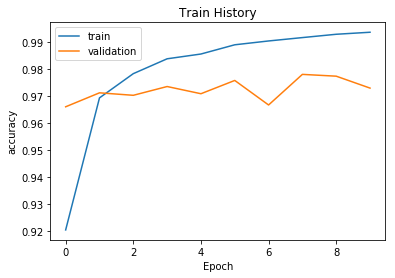

In [28]:
show_train_history(train_history,'accuracy','val_accuracy')

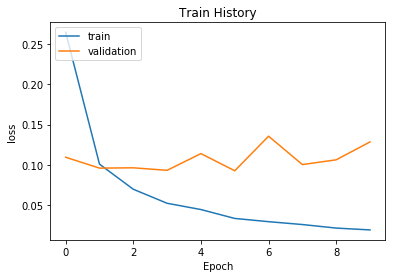

In [29]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [30]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9765999913215637


In [31]:
scores

[0.11559707745764145, 0.9765999913215637]